In [ ]:
%%capture
!pip install antropy -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import statistics as st
from antropy import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/data.csv')
df.head(n=10)

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sub_6,normal,618.0,638.0,2030.0,1330.0,1432.0,1388.0,1302.0,782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,sub_7,normal,632.0,670.0,724.0,700.0,740.0,760.0,730.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,sub_8,normal,330.0,624.0,740.0,772.0,690.0,728.0,828.0,810.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,sub_9,normal,426.0,774.0,748.0,666.0,664.0,668.0,674.0,852.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,sub_10,normal,662.0,668.0,742.0,760.0,732.0,774.0,790.0,758.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(54, 684)

In [ ]:
data=df.iloc[:,2::].T
labels=df.iloc[:,1].T

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,640.0,656.0,572.0,298.0,630.0,618.0,632.0,330.0,426.0,662.0,...,658.0,580.0,256.0,630.0,614.0,716.0,740.0,660.0,748.0,850.0
1,636.0,640.0,564.0,538.0,616.0,638.0,670.0,624.0,774.0,668.0,...,694.0,566.0,502.0,622.0,570.0,738.0,784.0,640.0,728.0,796.0
2,630.0,648.0,550.0,322.0,598.0,2030.0,724.0,740.0,748.0,742.0,...,636.0,576.0,302.0,602.0,566.0,724.0,798.0,662.0,744.0,816.0
3,656.0,622.0,526.0,532.0,638.0,1330.0,700.0,772.0,666.0,760.0,...,600.0,598.0,504.0,586.0,618.0,682.0,806.0,676.0,762.0,846.0
4,670.0,628.0,524.0,874.0,626.0,1432.0,740.0,690.0,664.0,732.0,...,628.0,624.0,302.0,594.0,630.0,674.0,816.0,660.0,714.0,804.0


In [ ]:
labels.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: labels, dtype: object

In [ ]:
data.dropna(how='any',inplace=True,axis=0)

In [ ]:
data.head(n=20)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,640.0,656.0,572.0,298.0,630.0,618.0,632.0,330.0,426.0,662.0,...,658.0,580.0,256.0,630.0,614.0,716.0,740.0,660.0,748.0,850.0
1,636.0,640.0,564.0,538.0,616.0,638.0,670.0,624.0,774.0,668.0,...,694.0,566.0,502.0,622.0,570.0,738.0,784.0,640.0,728.0,796.0
2,630.0,648.0,550.0,322.0,598.0,2030.0,724.0,740.0,748.0,742.0,...,636.0,576.0,302.0,602.0,566.0,724.0,798.0,662.0,744.0,816.0
3,656.0,622.0,526.0,532.0,638.0,1330.0,700.0,772.0,666.0,760.0,...,600.0,598.0,504.0,586.0,618.0,682.0,806.0,676.0,762.0,846.0
4,670.0,628.0,524.0,874.0,626.0,1432.0,740.0,690.0,664.0,732.0,...,628.0,624.0,302.0,594.0,630.0,674.0,816.0,660.0,714.0,804.0
5,644.0,644.0,510.0,850.0,616.0,1388.0,760.0,728.0,668.0,774.0,...,678.0,616.0,518.0,600.0,592.0,684.0,796.0,626.0,732.0,802.0
6,660.0,648.0,502.0,824.0,594.0,1302.0,730.0,828.0,674.0,790.0,...,706.0,608.0,732.0,602.0,570.0,658.0,798.0,624.0,768.0,818.0
7,608.0,698.0,496.0,854.0,620.0,782.0,700.0,810.0,852.0,758.0,...,732.0,614.0,760.0,600.0,602.0,676.0,772.0,628.0,792.0,814.0
8,618.0,772.0,502.0,858.0,626.0,698.0,654.0,774.0,808.0,718.0,...,640.0,616.0,818.0,598.0,674.0,686.0,790.0,600.0,762.0,824.0
9,648.0,790.0,520.0,866.0,646.0,802.0,616.0,886.0,810.0,722.0,...,606.0,606.0,842.0,608.0,694.0,666.0,784.0,604.0,754.0,782.0


In [ ]:
data.shape

(337, 54)

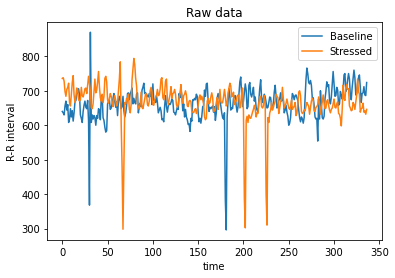

In [ ]:
plt.plot(data.iloc[:,0:1].values,label='Baseline'); 
plt.plot(data.iloc[:,27:28].values,label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Raw data')
plt.legend()


In [ ]:
data=np.where((data.values > 900) | (data.values<500), np.median(data.values), data.values)


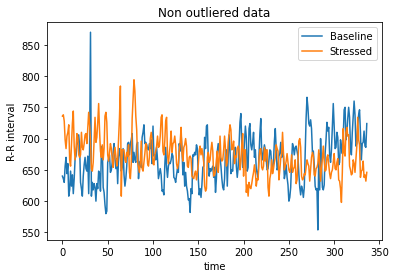

In [ ]:
plt.plot(data[:,0:1],label='Baseline'); #PLOT 
plt.plot(data[:,27:28],label='Stressed');
plt.xlabel('time')

plt.ylabel('R-R interval')
plt.title('Non outliered data')
plt.legend()

In [ ]:
from scipy.signal import savgol_filter
data=savgol_filter(data,5,3)

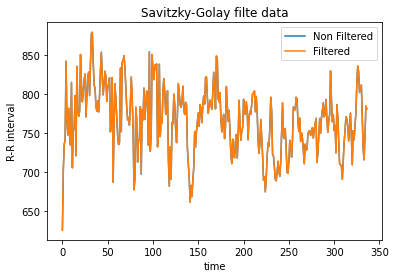

In [ ]:
plt.plot(data[:,10:11],label='Non Filtered'); #remove noise  
plt.plot(data[:,10:11],label='Filtered');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Savitzky-Golay filte data')
plt.legend()

In [ ]:
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x) ** 2))
def sdsd(x):
    return st.stdev(np.diff(x))
    
def nni_50(x):
    return  sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100 * nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) > 20)

def pnni_20(x):
    return  100 * nni_20(x) / len(x)

def avg_hr(x):
    return  st.mean(60000/x)
def std_hr(x):
    return  st.stdev(60000/x)
def min_hr(x):
    return  min(60000/x)
def max_hr(x):
    return  max(60000/x)

def energy(x):
    return sum(np.square(x))

def abs_sum_diff(x):
#     sum of absolute differences (SAD) is a measure of the similarity between signal
    return sum(np.abs(np.diff(x)))




In [ ]:
data=pd.DataFrame(data)
time_features=data.agg([np.mean,np.var, np.median,np.max,np.min,
                   ranges,rmssd,sdsd,nni_50,pnni_50,nni_20,pnni_20,
                        avg_hr,std_hr,min_hr,max_hr,
                        energy,abs_sum_diff,

                       ],axis=0)

In [ ]:
time_features.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,683.810767,609.724290,669.950657,671.716660,716.142433,675.835693,740.865451,714.894786,707.741077,707.438237,...,633.768885,671.137601,660.289445,642.105129,613.355829,713.386011,711.432132,659.320729,658.278762,811.396185
var,1425.453764,1323.634137,1014.914108,733.488333,1124.989604,1971.102651,2490.604858,2188.257762,1797.030709,2083.471694,...,926.291296,879.024375,862.989840,756.226233,908.655733,905.295861,772.105478,1068.590979,2513.845501,919.482301
median,684.371429,607.885714,668.400000,672.571429,714.514286,672.057143,735.714286,712.514286,704.628571,698.228571,...,631.771429,672.342857,662.457143,639.542857,608.400000,710.400000,708.571429,656.057143,659.371429,812.200000
amax,870.685714,726.628571,772.000000,734.342857,821.314286,814.057143,913.714286,845.885714,830.914286,854.971429,...,710.000000,754.057143,720.628571,717.542857,700.057143,811.828571,812.000000,771.085714,782.742857,897.485714
amin,578.685714,528.400000,540.228571,545.714286,592.057143,554.285714,612.800000,589.085714,612.514286,589.714286,...,566.228571,563.028571,542.800000,557.885714,552.114286,646.114286,637.771429,591.142857,550.457143,718.085714


In [ ]:
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [ ]:
data.shape,len(data)

((337, 54), 337)

In [ ]:
data.T[0]

0     649.285714
1     618.857143
2     627.714286
3     634.171429
4     648.514286
5     615.942857
6     640.228571
7     672.057143
8     691.600000
9     616.742857
10    626.228571
11    692.400000
12    806.571429
13    770.742857
14    724.628571
15    640.571429
16    636.514286
17    618.628571
18    652.342857
19    615.314286
20    684.342857
21    687.771429
22    710.628571
23    662.800000
24    708.971429
25    722.457143
26    738.057143
27    743.200000
28    678.114286
29    637.828571
30    641.542857
31    691.314286
32    648.171429
33    641.085714
34    667.428571
35    634.457143
36    647.542857
37    725.542857
38    723.428571
39    656.342857
40    730.228571
41    744.914286
42    672.400000
43    629.485714
44    646.342857
45    628.514286
46    637.085714
47    639.257143
48    637.828571
49    701.428571
50    714.457143
51    696.514286
52    723.657143
53    856.085714
Name: 0, dtype: float64

In [ ]:
rr_interpolated=[]
for i in range(len(data)):
    rr_manual=data.T[i]
    x = np.cumsum(rr_manual) / 1000.0#cumulative sum of data
    f = interp1d(x, rr_manual, kind='cubic',fill_value="extrapolate")#extra polation 
    fs = 4.0#new sampling frequency
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)
    rr_interpolated.append(f(xx))
    

In [ ]:
len(rr_interpolated),rr_interpolated[0].shape,rr_interpolated[27].shape,data.shape

(337, (143,), (145,), (337, 54))

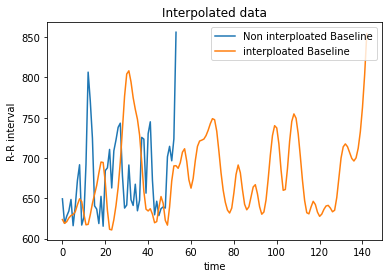

In [ ]:
plt.plot(data.iloc[0],label='Non interploated Baseline'); #PLOT 
plt.plot(rr_interpolated[0],label='interploated Baseline');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Interpolated data')
plt.legend()

In [ ]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rri, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    result=[vlf,lf,hf,total_power,lf/hf,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu]
    return np.array(result),fxx, pxx



In [ ]:
x=rr_interpolated[0]

In [ ]:
freq_feat=[]
for i in range(len(data.T)):
    results, fxx, pxx = frequency_domain(rr_interpolated[i])
    freq_feat.append(results)


/usr/local/lib/python3.8/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 143, using nperseg = 143
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.8/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg = 144
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.8/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 145, using nperseg = 145
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.8/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 141, using nperseg = 141
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.8/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater 

In [ ]:
np.array(freq_feat).shape

(54, 10)

In [ ]:
freq_col=['vlf','lf','hf','tot_pow','lf_hf_ratio','peak_vlf','peak_lf','peak_hf','lf_nu','hf_nu']
freq_features=pd.DataFrame(freq_feat,columns=freq_col)
freq_features.head()

,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,11.893521,856.641907,487.762857,1356.298285,1.756267,0.027972,0.111888,0.223776,63.719047,36.280953
1,129.051293,2246.355177,1219.258530,3594.664999,1.842394,0.027778,0.111111,0.250000,64.818395,35.181605
2,92.647688,1493.230024,1147.555422,2733.433134,1.301227,0.027586,0.110345,0.303448,56.544920,43.455080
3,209.930522,1420.973277,1003.436828,2634.340627,1.416106,0.028369,0.113475,0.312057,58.611094,41.388906
4,420.777357,463.411012,1346.726266,2230.914635,0.344102,0.027586,0.110345,0.331034,25.600877,74.399123


In [ ]:
features=pd.concat([time_features.T,freq_features],axis=1)
features.head()

,mean,var,median,amax,amin,ranges,rmssd,sdsd,nni_50,pnni_50,...,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,683.810767,1425.453764,684.371429,870.685714,578.685714,292.000000,32.373108,32.420276,25.0,7.418398,...,11.893521,856.641907,487.762857,1356.298285,1.756267,0.027972,0.111888,0.223776,63.719047,36.280953
1,609.724290,1323.634137,607.885714,726.628571,528.400000,198.228571,27.419438,27.460233,19.0,5.637982,...,129.051293,2246.355177,1219.258530,3594.664999,1.842394,0.027778,0.111111,0.250000,64.818395,35.181605
2,669.950657,1014.914108,668.400000,772.000000,540.228571,231.771429,24.665622,24.702297,17.0,5.044510,...,92.647688,1493.230024,1147.555422,2733.433134,1.301227,0.027586,0.110345,0.303448,56.544920,43.455080
3,671.716660,733.488333,672.571429,734.342857,545.714286,188.628571,23.206519,23.240901,16.0,4.747774,...,209.930522,1420.973277,1003.436828,2634.340627,1.416106,0.028369,0.113475,0.312057,58.611094,41.388906
4,716.142433,1124.989604,714.514286,821.314286,592.057143,229.257143,30.429503,30.474251,30.0,8.902077,...,420.777357,463.411012,1346.726266,2230.914635,0.344102,0.027586,0.110345,0.331034,25.600877,74.399123


In [ ]:
from scipy import stats
t_test=stats.ttest_ind(features.iloc[0:len(features)//2],features.iloc[len(features)//2:len(features)])[1]

In [ ]:
t_test=pd.DataFrame(zip(features.columns.tolist(),t_test.tolist()),columns=['feature','p_value'])

In [ ]:
t_test

,feature,p_value
0,mean,0.002500
1,var,0.000204
2,median,0.002509
3,amax,0.000664
4,amin,0.609502
5,ranges,0.000009
6,rmssd,0.000092
7,sdsd,0.000092
8,nni_50,0.000250
9,pnni_50,0.000250


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,shuffle=True,stratify=labels)

In [ ]:
from sklearn.preprocessing import StandardScaler,scale,MaxAbsScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
clf.score(X_test,y_test)

0.9411764705882353

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      normal       0.90      1.00      0.95         9
      stress       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[9 0]
 [1 7]]


In [ ]:
feature=scale(features)
clf=LogisticRegressionCV(max_iter=2000).fit(feature,labels)
clf.score(feature,labels)

0.7962962962962963

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), feature,labels, cv = 10).mean()

0.7

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.pipeline import Pipeline
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [ ]:
X,y=features,labels
accuracy=[]
accuracy_std=[]
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', clf)])

for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=27)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())


KNeighborsClassifier
****Results****
Accuracy: 77.7778%
SVC
****Results****


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Accuracy: 75.9259%
DecisionTreeClassifier
****Results****
Accuracy: 72.2222%
RandomForestClassifier
****Results****
Accuracy: 79.6296%
AdaBoostClassifier
****Results****
Accuracy: 70.3704%
GradientBoostingClassifier
****Results****
Accuracy: 85.1852%
GaussianNB
****Results****
Accuracy: 79.6296%
LinearDiscriminantAnalysis
****Results****
Accuracy: 81.4815%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 70.3704%
LogisticRegression
****Results****


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminan

Accuracy: 79.6296%


Text(0.5, 1.0, 'Cross Validation Accuracy')

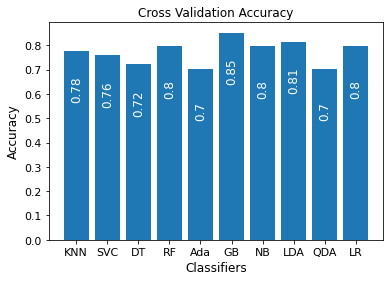

In [ ]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
ys=np.array(accuracy)
for index, value in enumerate(ys):
    plt.text(index-0.2,value-0.2, str(np.round(value,2)),rotation=90,color='white',fontsize=12)
plt.xticks(y_pos, classifier,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Classifiers',fontsize=12)
plt.title('Cross Validation Accuracy',fontsize=12)
